# FIT5196 Task 2 in Assessment 1
#### Student Name: Hristina Todorovska
#### Student ID: 29193869

Date: 14/04/2019

Version: 1.0

Environment: Python 3.6.4 and Jupyter notebook

Libraries used:
* re (for regular expression, included in Anaconda 4.4.10, Python 3.6.4) 
* nltk.data
* ast
* itertools
* from nltk.tokenize import RegexpTokenizer
* from __future__ import division
* from itertools import chain
* from nltk.probability import *
* from nltk.tokenize import MWETokenizer
* from nltk.stem import PorterStemmer
* from sklearn.feature_extraction.text import TfidfVectorizer
* from pylab import *

Task 2 is about text pre-procesing. The data set that was provided to me is a pdf file, that contains information or 200 units from Monash University. Each row (unit), contains info about unit code, synopsis and outcomes.

Before I start with the text processing, I use online tools to convert the pdf file into text.
I used  [PDF to Text – Convert PDF to Text Online](#https://pdftotext.com/) for converting.
Next I read the data into vector from which later I do the preprocessig.


## 1. Read the data from the txt file

In this part i will read the data into lists    


I will use regular expression that is why I need to import ``` re ``` library. <br>
I create methods that I will use for returning the data from the text file.

In [1]:
import re

In [2]:
def title(line):
    """
    Find unit titles in line
    :param line: (str) string
    return unit title or empty string     
    """    
    # find string which start with 3 to 4 capital letter and 4 digits 
    # and at the end has \n (newline) "ABCD1234\n"
    unitTitel = re.search(r"(^[A-Z]{3,4}\d{4})\n$", line)
    
    if (unitTitel):        
        return unitTitel.group(1) 
    return ''

From the file I know that my column names starts with letter and finish with \n , all column names are only one word. <br>
(Title, Synopsis, Outcomes)

In [3]:
def columnNames(line):
    """
    Find column names in line
    :param line: (str) string
    return olumn name or empty string
    """
    #find strings which start with letters  and contain only letter 
    #and at the end has \n (newline) "ColUmn\n"
    column = re.search(r"^([A-Za-z]+)\n$", line)
    if column:
        return column.group(1)
    return ''

In [4]:
def clean(line):
    """
    Clean line from newline and meta characters and replace with space
    :param line: (str) string
    """
    line = line.replace("\n", " ")
    line = line.replace('\r', ' ')
    return line

In this part I read the new txt file.  ```29193869pdftotxt.txt```

In [5]:
pdf_txt= open('29193869pdftotxt.txt','r')

# set counter to 0
countTitle = 0

# empty list for saving the data
unitTitles = []
columns = []
outcome = []
synopses = []

# inicialize empty string 
synopsisLine = ''

#flags set to default FALSE
isTitle = False
isSynopsis = False
isOutcomes = False

# initialize empty dictionary
data = {}

#iterate through the document by line
for line in pdf_txt:     
    
    #
    # If empty line (start and end with \n) 
    # if flag isSynopsis is TRUE means that the previous line was Synopsis synopsisLine string 
    # (set in previous line) append to the synopses list
    # set: isTitle, isSynopsis, isOutcomes to False
    # continue on with the next iteration
    #
    
    if (re.search(r"^\n$", line)):
        if isSynopsis == True:
            synopses.append(synopsisLine)
        isSynopsis = False
        isTitle = False        
        isOutcomes = False
        
        continue        
    
    #clean \x0c 
    line = line.replace('\x0c', '')
    
    # If unitTitle length is greather than 0, set isTitle to True
    # append unit title to list unitTitles
    # continue on with the next iteration
    
    unitTitle = title(line)
    if len(unitTitle) > 0:
        unitTitles.append(unitTitle)
        countTitle +=1
        isTitle = True
        continue
    
   
    # first lines before find any Title are for the columns
    # if countTitle is 0 and column found, append column Name
    # continue on with the next iteration
    column = columnNames(line)
    if countTitle == 0 and len(column) > 0:
        columns.append(column)
        continue
    
    # Outcome start with [ and end with ]\n in multiple line or one line
    # outcome in one line , append outcome to list and setisOutcomes = False 
    if line.startswith('[') and line.endswith("]\n"):
        outcome.append(clean(line))
        isOutcomes = False
        continue
        
    # outcome in multiple lines,First Line set isOutcomes = True    
    if line.startswith('['):
        isOutcomes = True
        outcomeLine = clean(line)
        continue
        
     # outcome in multiple lines,Last Line set isOutcomes = False     
    if line.endswith("]\n"):
        outcomeLine += ' '
        outcomeLine += ' '.join([clean(line)])
        outcome.append(outcomeLine)
        isOutcomes = False
        continue
      
    # outcome in multiple lines, Line between check if isOutcomes = True
    if isOutcomes == True:
        outcomeLine += ' '.join([clean(line)])
        continue
    
    # Synopsis (all Synopsis are in multiple lines)
    # check for flags isOutcomes and isTitle if are False and if is not empty line
    # set isSynopsis == True
    if isOutcomes == False and not line == '\n' and isTitle == False:        
        # in between line Synopsis
        if isSynopsis == True:
            synopsisLine += ' '
            synopsisLine += ' '.join([clean(line)])
        # first line Synopsis
        else:
            synopsisLine = clean(line)
            isSynopsis = True
        

If i print the length of all three lists unitTitles, outcome and synopses. We can see that all of them have 200 items

In [6]:
print(columns)
print(len(unitTitles))
print(len(outcome))
print(len(synopses))

['Title', 'Synopsis', 'Outcomes']
200
200
200


## 2. Normalize

In this part I am normalizing to lowercase, except the capital tokens appeared in the middle of a sentence.

This method ```sentenceNormalization ``` is converting to lower only the first word in the sentence

For sentence Tokenize, I am using <br>
```import nltk.data
   sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
```

In [7]:
import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [8]:
def sentenceNormalization(string):
    sentOut = sent_detector.tokenize(string)
    normalized = ''
    for k in range(len(sentOut)):
        #sentOut[k] = sentOut[k][0].lower() + sentOut[k][1:]
        #print(sentOut[k][0])
        sentOut[k] = sentOut[k][0].lower() + sentOut[k][1:]
        #print(sentOut[k])
        
        normalized = normalized + " " +sentOut[k] 
          
    return normalized

Because the outcome for Synopsis is format as list byt type is string , I will use ```ast``` library to convert the string into list 

In [9]:
import ast

In [10]:

#sent_detector = nltk.data.load('nltk_data/english.pickle')

unitDic = {}
unitSent = {}
for i in range(len(unitTitles)):    
    
    # Synopsis list normalize
    synNorm = sentenceNormalization(synopses[i])
    
    # remove multiple spaces
    synNorm = re.sub('\s+', ' ', synNorm).strip()
    
     # save sentance for later use
    sent = sent_detector.tokenize(synNorm)
   
    # Outcomes
    out = ast.literal_eval(outcome [i])
    outNorm = ''
    for j in range(len(out)):
        out[j] = re.sub('\s+', ' ', out[j]).strip()
        sent.append(sentenceNormalization(out[j]))
        outNorm =outNorm + " " +sentenceNormalization(out[j])
        
    # concatanate normalizd Synopsis and Outcomes into one string
    synNorm = synNorm + " " + outNorm  
    
    #create dictionary with string sentence
    unitDic[unitTitles[i]] = synNorm 
    #create dictinonary with list of sentences
    unitSent[unitTitles[i]] = sent


print(unitDic['APG5393'])
print("-------------------")
print(unitSent['APG5393'])

this unit aims to provide students with a basic understanding of ethical theory, as a foundation for their studies in bioethics. the unit outlines several key perspectives in normative ethics, including Kantian ethics, Utilitarianism, and Virtue Ethics, and examines several key problems for each of these approaches. the unit also considers certain issues in meta-ethics, such as the question of whether moral judgements must be relative to individuals or cultures or whether they can be objective, and the implications of research in social and moral psychology for accounts of moral motivation.   bring a solid theoretical framework to the analysis and evaluation of issues in bioethics;  recognise, analyse, and evaluate ethical arguments;  think critically about assumptions underlying debates in bioethics and applied ethics;  see that certain issues in ethical theory are of intrinsic interest and value.  develop a sufficient understanding of long-standing debates about the nature of ethics 

## 3. The word tokenization

After we normalize the data we can continue with Tokenization

In [11]:
from nltk.tokenize import RegexpTokenizer

In [12]:
def tokenizeUnitData(unitId, unitText):
    """
        This function tokenizes a unit text document.
    """
    tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")
    tokenisedUnit = tokenizer.tokenize(unitText)
   
    return (unitId, tokenisedUnit) 

In [13]:
# tokenized units
tokenizedUnits =  dict(tokenizeUnitData(key, value) for key, value in unitDic.items())

print(len(tokenizedUnits))


192


From the length we can see that we have a repetition of 8 Units, because we are using a dictionary and as a key, we are using UnitCode, we get to read of duplicates. <br>
Lets see the format:

In [14]:
tokenizedUnits["APG5393"]

['this',
 'unit',
 'aims',
 'to',
 'provide',
 'students',
 'with',
 'a',
 'basic',
 'understanding',
 'of',
 'ethical',
 'theory',
 'as',
 'a',
 'foundation',
 'for',
 'their',
 'studies',
 'in',
 'bioethics',
 'the',
 'unit',
 'outlines',
 'several',
 'key',
 'perspectives',
 'in',
 'normative',
 'ethics',
 'including',
 'Kantian',
 'ethics',
 'Utilitarianism',
 'and',
 'Virtue',
 'Ethics',
 'and',
 'examines',
 'several',
 'key',
 'problems',
 'for',
 'each',
 'of',
 'these',
 'approaches',
 'the',
 'unit',
 'also',
 'considers',
 'certain',
 'issues',
 'in',
 'meta-ethics',
 'such',
 'as',
 'the',
 'question',
 'of',
 'whether',
 'moral',
 'judgements',
 'must',
 'be',
 'relative',
 'to',
 'individuals',
 'or',
 'cultures',
 'or',
 'whether',
 'they',
 'can',
 'be',
 'objective',
 'and',
 'the',
 'implications',
 'of',
 'research',
 'in',
 'social',
 'and',
 'moral',
 'psychology',
 'for',
 'accounts',
 'of',
 'moral',
 'motivation',
 'bring',
 'a',
 'solid',
 'theoretical',
 'fram

Here I am checking how many types we have in the whole document and the lexical diversity 

In [15]:
from __future__ import division
from itertools import chain

words1 = list(chain.from_iterable(tokenizedUnits.values()))
vocab1 = set(words1)
lexical_diversity = len(words1)/len(vocab1)
print("Vocabulary size: ",len(vocab1),"\nTotal number of tokens: ", len(words1),
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  4037 
Total number of tokens:  30961 
Lexical diversity:  7.669308892742135


Here I am ploting 25 most frequent words.

In [16]:
from nltk.probability import *
fd_1 = FreqDist(words1)
fd_1.plot(25, cumulative=True)

## 4. Bigrams


In this part I am going to return first 200 meningful bigrams (i.e., collocations) using PMI (Pointwise Mutual Information) measure. <br>
The following code will find the best 200 bigrams using the PMI scores.

** If we want to filter for the bigrams words which length is less than 3, we should include <br>
    ```finder.apply_word_filter(lambda w: len(w) < 3) ```
 

In [17]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(list(chain.from_iterable(tokenizedUnits.values())))

# do not include in bigrams words that lengths is less than 3
# finder.apply_word_filter(lambda w: len(w) < 3)
bestBigrams = finder.nbest(bigram_measures.pmi, 200)

#return length of bestBigrams
print(len(bestBigrams))

# print bestBigrams 
bestBigrams

200


[('1000', 'BCE'),
 ('2014', 'Victoria'),
 ('9', '11'),
 ('ATS2296', 'ATS3296'),
 ('ATS2800', 'Music'),
 ('ATS3296', 'Musical'),
 ('Acting', 'Production'),
 ('Architecture', 'Foundation'),
 ('Assyria', 'Babylon'),
 ('Babylon', 'Persia'),
 ('Bayes', 'theorem'),
 ('Brazil', 'Russia'),
 ('Cervantes', 'Goethe'),
 ('Christian', 'church'),
 ('Contemporary', 'Practices'),
 ('Control', 'Points'),
 ('Critical', 'Control'),
 ('Dante', 'Cervantes'),
 ('Disaster', 'Victim'),
 ('El', 'Nino'),
 ('Emilia', 'Romagna'),
 ('Entity', 'Relationship'),
 ('Extended', 'Entity'),
 ('Fourier', 'transforms'),
 ('Good', 'Manufacturing'),
 ('Hellenistic', 'novel'),
 ('Introductory', 'equal'),
 ('Islander', 'peoples'),
 ('Italian', 'Resistance'),
 ("Kleopatra's", 'Egypt'),
 ('List', 'Schumpeter'),
 ('MD', 'curriculum'),
 ('Malthus', 'Smith'),
 ('Marx', 'Keynes'),
 ("Master's", 'prepared'),
 ('Medicine', 'MD'),
 ('Modern', 'Standard'),
 ('NUR1110', 'NUR1111'),
 ('Newton', 'Euler'),
 ('Nino', 'Southern'),
 ('OCC2020'

 After we have best 200 meningful bigrams, I will Re-tokenize the units again.

In [18]:
from nltk.tokenize import MWETokenizer

mwetokenizer = MWETokenizer(bestBigrams)

collocUnits =  dict((unitId, mwetokenizer.tokenize(unitText)) for unitId,unitText in tokenizedUnits.items())
allWordsColloc = list(chain.from_iterable(collocUnits.values()))
collocVoc = list(set(allWordsColloc))

checking how many types we have in the whole document and the lexical diversity, after bigrams.

In [19]:
words2 = allWordsColloc
vocab2 = set(words2)
lexical_diversity2 = len(words2)/len(vocab2)
print ("Vocabulary size: ",len(vocab2),"\nTotal number of tokens: ", len(words2), 
"\nLexical diversity: ", lexical_diversity2)

Vocabulary size:  3874 
Total number of tokens:  30791 
Lexical diversity:  7.948115642746515


Lets check the difference:

In [20]:
print ("Vocabulary size difference: ",len(vocab1)-len(vocab2),"\nTotal number of tokens difference: ", len(words1) - len(words2))

Vocabulary size difference:  163 
Total number of tokens difference:  170


## 5. Remove tokens with the length less than 3

In [21]:
filteredUnits1 = {}

#iterate through all units and return only tokens which len < 3
for unitId, tokens in collocUnits.items():
    filteredUnits1[unitId] = [w for w in collocUnits[unitId] if not len(w) < 3]
    
# list of all tokens    
filteredAllWords1 = list(chain.from_iterable(filteredUnits1.values()))

# list of all vocab 
filteredVoc1 = list(set(filteredAllWords1))

In [22]:
words3 = filteredAllWords1
vocab3 = set(words3)
lexical_diversity3 = len(words3)/len(vocab3)
print ("Vocabulary size: ",len(vocab3),"\nTotal number of tokens: ", len(words3), 
"\nLexical diversity: ", lexical_diversity3)

Vocabulary size:  3820 
Total number of tokens:  25813 
Lexical diversity:  6.757329842931937


Checking how many tokens and vocab are removed.

In [23]:
print ("Vocabulary size difference: ",len(vocab2)-len(vocab3),"\nTotal number of tokens difference: ", len(words2) - len(words3))

Vocabulary size difference:  54 
Total number of tokens difference:  4978


## 6. Stopping Words

### 6.1  The context-independent stopping words

In this part I will remove stopping words from the given file.

In [24]:
# save all stopping words into a list
stopWordsInd = [line.rstrip('\n') for line in open('stopwords_en.txt')]
print(len(stopWordsInd))

571


In [25]:
filteredUnits2 = {}

#iterate through all units and return only tokens which are not in stopWordsInd list
for unitId, tokens in filteredUnits1.items():
    filteredUnits2[unitId] = [w for w in filteredUnits1[unitId] if w not in stopWordsInd]
    
filteredAllWords2 = list(chain.from_iterable(filteredUnits2.values()))  
filteredVoc2 = list(set(filteredAllWords2))



In [26]:
words4 = filteredAllWords2
vocab4 = set(words4)
lexical_diversity4 = len(words4)/len(vocab4)
print ("Vocabulary size: ",len(vocab4),"\nTotal number of tokens: ", len(words4), 
"\nLexical diversity: ", lexical_diversity4)

Vocabulary size:  3616 
Total number of tokens:  18259 
Lexical diversity:  5.04950221238938


Checking how many tokens and vocab are removed.

In [27]:
print ("Vocabulary size difference: ",len(vocab3)-len(vocab4),"\nTotal number of tokens difference: ", len(words3) - len(words4))

Vocabulary size difference:  204 
Total number of tokens difference:  7554


### 6.2  The context-dependent (with the threshold set to %95) stopping words

In this part I am going to check the most frequent tokens per units.

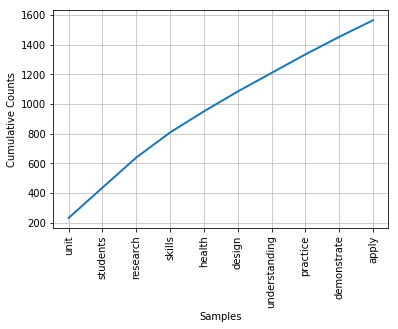

In [28]:
# ploting the most frequent words
fd2 = FreqDist(filteredAllWords2)
fd2.plot(10, cumulative=True)

 Plot frequency of the frequencies of word types in a given file.

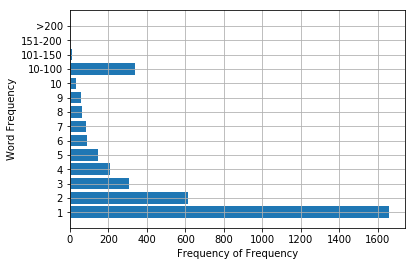

In [29]:
ffd = FreqDist(fd2.values())

from pylab import *
y = [0]*14
for k, v in ffd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 100:
        y[10] =  y[10] + v
     elif k >100 and k <= 150:
        y[11] =  y[11] + v
     elif k > 150 and k <= 200:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
x = range(1, 15) # generate integer from 1 to 14
ytks =list(map(str, range(1, 11))) # covert a integer list to a string list
ytks.append('10-100')
ytks.append('101-150')
ytks.append('151-200')
ytks.append('>200')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
grid(True)

Calculate 95% of all documents.( 0.49 to round up )

In [30]:
docMost = round((95 * len(filteredUnits2)) / 100.0 + 0.49)
docMost

183

In [31]:
# find the words that repeat in more then 95% of the units or in 183 or more units
mostFreqWords = set([k for k, v in fd2.items() if v >= docMost])
mostFreqWords = list(mostFreqWords)
print(mostFreqWords)

['unit', 'students', 'research']


we can see that only 3 words appear in 95% of the units, in the next part I am going to remove that words.

In [32]:
filteredUnits3 = {}

#iterate through all units and return only tokens which are not in mostFreqWords list
for unitId, tokens in filteredUnits2.items():
    filteredUnits3[unitId] = [w for w in filteredUnits2[unitId] if w not in mostFreqWords]
    
filteredAllWords3 = list(chain.from_iterable(filteredUnits3.values()))  
filteredVoc3 = list(set(filteredAllWords3))


In [33]:
words5 = filteredAllWords3
vocab5 = set(words5)
lexical_diversity5 = len(words5)/len(vocab5)
print ("Vocabulary size: ",len(vocab5),"\nTotal number of tokens: ", len(words5), 
"\nLexical diversity: ", lexical_diversity5)

Vocabulary size:  3613 
Total number of tokens:  17620 
Lexical diversity:  4.876833656241351


Checking how many tokens and vocab are removed.

In [34]:
print ("Vocabulary size difference: ",len(vocab4)-len(vocab5),"\nTotal number of tokens difference: ", len(words4) - len(words5))

Vocabulary size difference:  3 
Total number of tokens difference:  639


## 7. Remove Rare tokens 

For removing remove rare tokens with threshold 5% , i will use simmilar step as 6.1 step or 6.2 the context-dependent (with the threshold set to %95) stopping words.


In [35]:
fd3 = FreqDist(filteredAllWords3)
ffd3 = FreqDist(fd3.values())

Calculate 5% of all documents.( 0.49 to round up )

In [36]:
docLess = round((5 * len(filteredUnits3)) / 100.0 + 0.49)
docLess

10

In [37]:
# find the words that repeat in less then 5% of the units or in less then 10 units
lessFreqWords = set([k for k, v in fd3.items() if v < docLess])
lessFreqWords = list(lessFreqWords)
print(len(lessFreqWords))


3229


We can see that 3229 words appear in only 5% of the units, in the next part I am going to remove that words.

In [38]:
filteredUnits4 = {}

#iterate through all units and return only tokens which are not in lessFreqWords list
for unitId, tokens in filteredUnits3.items():
    filteredUnits4[unitId] = [w for w in filteredUnits3[unitId] if w not in lessFreqWords]
    
filteredAllWords4 = list(chain.from_iterable(filteredUnits4.values()))  
filteredVoc4 = list(set(filteredAllWords4))

In [39]:
words6 = filteredAllWords4
vocab6 = set(words6)
lexical_diversity6 = len(words6)/len(vocab6)
print ("Vocabulary size: ",len(vocab6),"\nTotal number of tokens: ", len(words6), 
"\nLexical diversity: ", lexical_diversity6)

Vocabulary size:  384 
Total number of tokens:  10079 
Lexical diversity:  26.247395833333332


Checking how many tokens and vocab are removed.

In [40]:
print ("Vocabulary size difference: ",len(vocab5)-len(vocab6),"\nTotal number of tokens difference: ", len(words5) - len(words6))

Vocabulary size difference:  3229 
Total number of tokens difference:  7541


## 8. Steamming

In this part I am going steam the words using The Porter Stemming Algorithm. <br>

In [41]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()


The Porter Steamming will steam the tokens in lowercase, for the assessment requiraments we should keep the capital letter for tokens that are in the middle of the sentence.
Because of that, I will skip steam the tokens that are uppercase. 

In [42]:
finalUnits = {}
stemUnit = {}
for unitId, tokens in filteredUnits4.items():
    stemSent = []
    for i in range(len(tokens)):
        if(tokens[i].islower()):
            stemSent.append(ps.stem(tokens[i])) 
        else:
            stemSent.append(tokens[i])
    finalUnits[unitId] = stemSent

    
finalAllWords = list(chain.from_iterable(finalUnits.values()))  
finalVoc = list(set(finalAllWords))


In [43]:
words7 = finalAllWords
vocab7 = set(words7)
lexical_diversity7 = len(words7)/len(vocab7)
print ("Vocabulary size: ",len(vocab7),"\nTotal number of tokens: ", len(words7), 
"\nLexical diversity: ", lexical_diversity7)

Vocabulary size:  303 
Total number of tokens:  10079 
Lexical diversity:  33.26402640264026


Checking how many tokens and vocab are removed.

In [44]:
print ("Vocabulary size difference: ",len(vocab6)-len(vocab7),"\nTotal number of tokens difference: ", len(words6) - len(words7))

Vocabulary size difference:  81 
Total number of tokens difference:  0


We can see that tokens length stay the same only the number of vocab is reduced.

Checking how many tokens and vocab are removed from the start.

In [45]:
print ("Vocabulary size difference: ",len(vocab1)-len(vocab7),"\nTotal number of tokens difference: ", len(words1) - len(words7))

Vocabulary size difference:  3734 
Total number of tokens difference:  20882


## 9. Output

Generate the TF-IDF vectors for all the units.

In [46]:
unitIds = []
unitWords = []
for unitId, tokens in finalUnits.items():
    unitIds.append(unitId)
    txt = ' '.join(tokens)
    unitWords.append(txt)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

#keep upper case, and use token_pattern given in the assessment specification
tfidf_vectorizer = TfidfVectorizer(input = 'content', analyzer = 'word', lowercase=False, token_pattern=r"\w+(?:[-']\w+)?")
tfidf_vectors = tfidf_vectorizer.fit_transform(unitWords)
tfidf_vectors.shape

(192, 303)

Save the vocab in ```29193869_vocab.txt_vocab.txt``` file . <br>
Format of the file ```token_string:integer_index``` <br>
Tokens in the vocabulary sorted in alphabetical order.

In [48]:
import itertools
save_file1 = open("29193869_vocab.txt", 'w')
vocab = tfidf_vectorizer.get_feature_names()

#sort the vocabulary in alphabetical order 
vocab.sort(key=lambda v: v.upper())

count = 0
vocDic = {}
for each in vocab:
    count += 1
    save_file1.write(each + ':' + str(count) + '\n')
    vocDic[each] = count
save_file1.close()


Save the sparse representations of one of the units in ```29193869_countVec.txt``` file. <br>
Format of the file ``` unit_code, token1_index:wordcount, token2_index:wordcount,..., tokenN_index:wordcount ```


In [49]:
save_file2 = open("29193869_countVec.txt", 'w')
    
for unitId, words in finalUnits.items():
    line = unitId+","
    
    #iterate through vocab dictionary
    for k,v in vocDic.items():       
        c = words.count(k)
        if(c>0):
            line += str(v) + ":" + str(c) + ","
    # remove last comma (,)
    line = line[:-1]
    line += '\n'
    save_file2.write(line)
    
save_file2.close()

## 10. Summary

In [50]:
perVocabLeft = (len(vocab7)/len(vocab1))*100
perVocabLeft
removedPer = 100-perVocabLeft

print("After the processing of the text there are  {0:.2f}".format(perVocabLeft), "% words left in the document")
print("and  {0:.2f}".format(removedPer), "% words removed from the document")

After the processing of the text there are  7.51 % words left in the document
and  92.49 % words removed from the document


In [51]:
perWordsLeft = (len(words7)/len(words1))*100
perWordsLeft
removedWordPer = 100-perWordsLeft

print("After the processing of the text there are  {0:.2f}".format(perWordsLeft), "% tokens left in the document")
print("and  {0:.2f}".format(removedWordPer), "% tokens removed from the document")

After the processing of the text there are  32.55 % tokens left in the document
and  67.45 % tokens removed from the document
